In [1]:
from pystac_client import Client
import fsspec
import xarray as xr
import h5py
import pandas as pd

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJQXzJqUU50Y3QtOGR2cW1qVG5QWDVNc3BfT1Zid2lzVFlHbmFwM2tUWVdJIn0.eyJleHAiOjE3NDcyNDk2NjYsImlhdCI6MTc0NzIxMzY2NiwianRpIjoiMGNjMzdkNDAtZDM1YS00MmMzLWJlZWMtODVhNGRiNWY4YzBiIiwiaXNzIjoiaHR0cHM6Ly9pYW0ubWFhcC5lby5lc2EuaW50L3JlYWxtcy9lc2EtbWFhcCIsInN1YiI6IjhhYjZmMWMyLWUzYmUtNDAyNC04YTBlLTg2YWMxZmViOGI3ZiIsInR5cCI6IkJlYXJlciIsImF6cCI6ImJpby1wZGdzLXN5cy11c2VycyIsInNpZCI6IjYwMzk3YjQ1LTQ2MDYtNGYyOS1hYWM2LTIzYTVkYmIxYzcyMSIsInNjb3BlIjoib3BlbmlkIiwiZ3JvdXBzIjpbIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eCIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eElPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eFJlc3QiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDAiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDBJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYUlPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWIiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFiSU9DIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWNJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDJhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwyYUlPQyIsIi9leHBsb3JlciJdfQ.ZqKwa0cMB6lqslOIZ741HItTdNaoXjcVG9FnmfozKX-Yvw2zafoXufEIxBPIK9vm1s33LHQQjuSqBPC6hr2n07cf2kImxh8ZHLujuJHMafpUDgtqApYrHa9bQqlCF7-XT4N_Qlp7IfUAN5--JLVHVuFS0uzPfcjHAWljRj69iX0AJOIfOD7KR5KTo_GPB3ctFvGNgb1qfI5T_cS0EUDjzD5iudJMO8pNGTDfHm-RwB_hPM5iVbk312drjA4k866F1GxqOtBXXqXyuTjhfxiwv-AaaZxdCGLBW2y8U6Ttea1bBKYZ3R9XvNGHQJsq2EWW-ZUCROt9umASZeoOTelXtg'

In [5]:
token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJQXzJqUU50Y3QtOGR2cW1qVG5QWDVNc3BfT1Zid2lzVFlHbmFwM2tUWVdJIn0.eyJleHAiOjE3NDczNDExNzQsImlhdCI6MTc0NzMwNTE3NCwianRpIjoiMDE4NDI1NjctMWU4NC00YTFlLWFlZDctMzZkYmUxNTIwZGE3IiwiaXNzIjoiaHR0cHM6Ly9pYW0ubWFhcC5lby5lc2EuaW50L3JlYWxtcy9lc2EtbWFhcCIsInN1YiI6IjhhYjZmMWMyLWUzYmUtNDAyNC04YTBlLTg2YWMxZmViOGI3ZiIsInR5cCI6IkJlYXJlciIsImF6cCI6ImJpby1wZGdzLXN5cy11c2VycyIsInNpZCI6IjU0YzhkNTgwLWRmYzItNDg5Zi05ZTM4LThiMTI0YTkzZDI5OCIsInNjb3BlIjoib3BlbmlkIiwiZ3JvdXBzIjpbIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eCIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eElPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eFJlc3QiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDAiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDBJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYUlPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWIiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFiSU9DIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWNJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDJhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwyYUlPQyIsIi9leHBsb3JlciJdfQ.zAwQmDKJi8Sk5kqBfP55ZKWpLb4vf9bS-lYaE4kD0Ln30kHLkKrzg3Q_b74HNzrpkAJh_smsgX8ody8jA-6ypDG0KIIZOzF-n9DoAsp-D-Xi8kAPgsAKUm_fbOxBQ8oHVpPhh4uUU40rAUKOk-eJt1hk0qELXh0VYbczM19iBcajz-yV-GUpREAJQSF9ZhPKzZ0IYRAk44UM_4zLyxFmHmhhOHKe-jZqT6oiMazLGgvq6AYyASh5msAIJhJVAGSYTORFenuVv7Z5wDLFx2K0OHDUjjnx1jnNTVz0LDtGJdydfkfFYPD4ZLAeOJZH9Cl6BoAsrf5T7XSkYlb0RFQ7ew'

#### Navigate the catalog and filter

In [6]:
catalog_url = 'https://catalog.maap.eo.esa.int/catalogue/'
catalog = Client.open(catalog_url)

In [7]:
search = catalog.search(
    collections=["EarthCAREL2InstChecked_MAAP"], # Currently MAAP has access to this L2 collection 

    #filter="productType = 'MSI_COP_2A'", # Filter by product type
    filter="productType = 'MSI_COP_2A' and frame = 'E'",

    datetime=['2025-04-01T00:00:00.000Z', '2025-04-30T23:59:00.000Z'], # filter by temporal extent 
    
    bbox = [0, -20, 10, -10], # combine multiple bbox by OR 
    # bounding box is defined by the bottom left corner (longmin latmin) and the top right corner coordinates (longmax latmax) 

    max_items=10  # Adjust as needed
)

items = list(search.items())
results = dict() # or just {} 
id_lst = []
href_lst = []
for item in items:
    id_lst.append(item.id)
    href_lst.append(item.assets["enclosure_1"].href)

for i, j in zip(id_lst, href_lst):
    results.update({i: j})


In [8]:
print(len(items))

10


In [9]:
fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})
href = href_lst[1]

with fs.open(href, "rb") as f:
    with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
        ds.load()


In [10]:
ds

<xarray.Dataset> Size: 297MB
Dimensions:                        (along_track: 11904, across_track: 384)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track) datetime64[ns] 95kB 2025-04-...
    latitude                       (along_track, across_track) float64 37MB n...
    longitude                      (along_track, across_track) float64 37MB n...
    geoid_offset                   (along_track) float32 48kB 4.0 ... 9.969e+36
    missing_lines_before_flag      (along_track) int8 12kB 0 0 0 0 0 ... 0 0 0 0
    quality_status                 (along_track, across_track) int8 5MB 3 ... 3
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 18MB n...
    cloud_top_temperature          (along_track, across_track) float32 18MB n...
    cloud_top_height               (along_track, across_track) float32 18MB n...
    cloud_top_pressure_error       (along_track, across_track) float32 18MB n...
    cloud_top_temperature_error    (along_track, across_track) float32 18MB n...
    cloud_top_height_error         (along_track, across_track) float32 18MB n...

In [11]:
def crop_to_stcu_region(ds):
    lon_min, lat_min, lon_max, lat_max = (0, -20, 10, -10)
    ds0 = ds.where((ds.longitude >= lon_min) & (ds.longitude <= lon_max) 
                   & (ds.latitude >= lat_min) & (ds.latitude <= lat_max), drop=True)
    return ds0

In [12]:
ds0 = crop_to_stcu_region(ds)

In [28]:
ds0

<xarray.Dataset> Size: 76MB
Dimensions:                        (along_track: 2522, across_track: 357)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track, across_track) datetime64[ns] 7MB ...
    latitude                       (along_track, across_track) float64 7MB -1...
    longitude                      (along_track, across_track) float64 7MB 9....
    geoid_offset                   (along_track, across_track) float32 4MB 9....
    missing_lines_before_flag      (along_track, across_track) float32 4MB 0....
    quality_status                 (along_track, across_track) float32 4MB 0....
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 4MB 7....
    cloud_top_temperature          (along_track, across_track) float32 4MB 28...
    cloud_top_height               (along_track, across_track) float32 4MB 3....
    cloud_top_pressure_error       (along_track, across_track) float32 4MB na...
    cloud_top_temperature_error    (along_track, across_track) float32 4MB 1....
    cloud_top_height_error         (along_track, across_track) float32 4MB na...

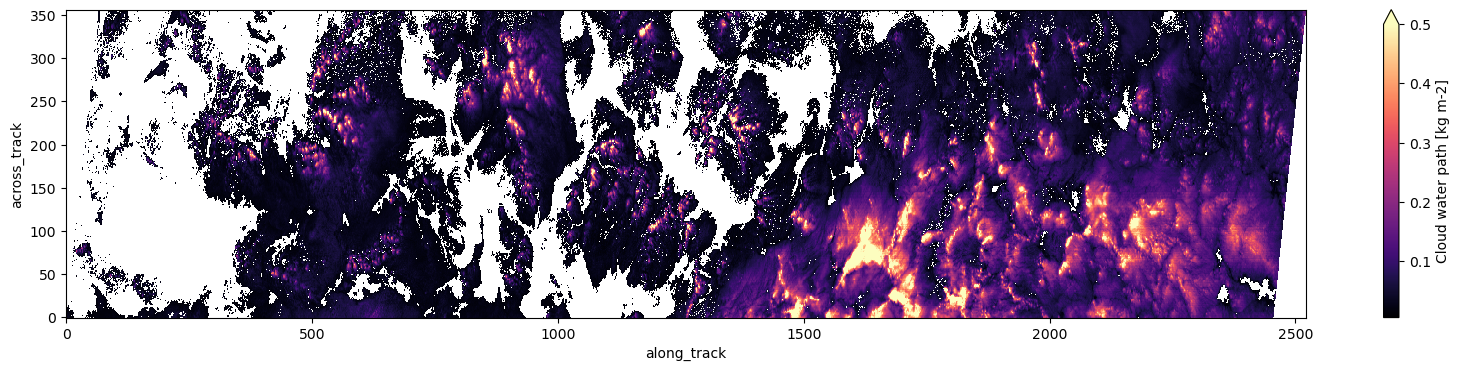

In [67]:
ds0.cloud_water_path.T.plot(vmax=0.5, figsize=(20,4), cmap='magma')

## LWP distribution

In [68]:
def get_cloud_mask(ds0):
    valid_mask = ~np.isnan(ds0.latitude)
    cld_mask = xr.where(ds0.cloud_water_path > 0, 1, 0).where(valid_mask)
    return cld_mask

In [16]:
def get_number_of_pixels_in_region(ds0):
    n_pixels = float(ds0.latitude.count())
    return n_pixels

In [69]:
def compute_lwp_distr_parameters(lwp, save_plot=None):
    lwp = lwp.where(lwp > 0)  # following the StCu group
    lwp_clean = lwp.where(np.isfinite(lwp))

    if save_plot is not None:
        sns.histplot(lwp_clean.values.flatten(), log_scale=True)
        plt.show()
        plt.savefig(save_plot)

    # compute mean and std
    lwp_mean = float(lwp_clean.mean().values)
    lwp_std = float(lwp_clean.std().values)
    
    # compute nondimensional homogeneity parameter
    homog_param = ((lwp_mean / lwp_std)**2)
    
    # Calculate the skewness 
    lwp_skew = scipy.stats.skew(lwp_clean.values.flatten(), bias=False, nan_policy='omit')
    
    # Calculate the kurtosis 
    lwp_curtosis = scipy.stats.kurtosis(lwp_clean.values.flatten(), nan_policy='omit')

    return lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis

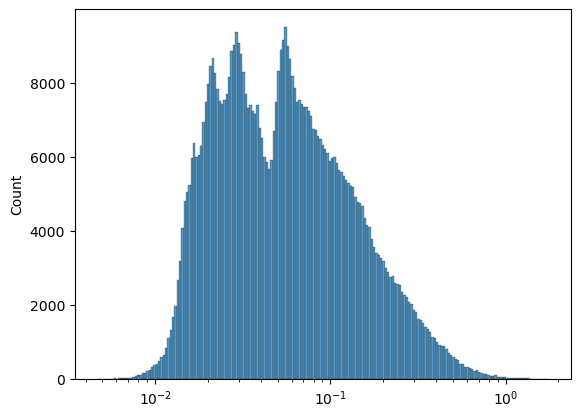

(0.08378449827432632,
 0.09484363347291946,
 0.7803887133563228,
 np.float64(3.287444829940796),
 np.float32(17.315092))

<Figure size 640x480 with 0 Axes>

In [70]:
compute_lwp_distr_parameters(lwp=ds0.cloud_water_path, save_plot='tmp.png')

## Power spectrum

In [31]:
def get_power_spectrum(ds0, save_plot=True):
    da = ds0.cloud_water_path
    da_clean = da.where(np.isfinite(da))
    image = np.where(np.isnan(da_clean.values), 0, da_clean.values)
    image = np.where(np.isnan(da_clean.values), 0, 1)
    F = np.fft.fft2(image)
    F_shifted = np.fft.fftshift(F)
    power_spectrum = np.abs(F_shifted)**2

    nx, ny = image.shape
    kx = np.fft.fftfreq(nx) * nx
    ky = np.fft.fftfreq(ny) * ny
    kx_shifted = np.fft.fftshift(kx)
    ky_shifted = np.fft.fftshift(ky)
    KX, KY = np.meshgrid(kx_shifted, ky_shifted, indexing='ij')
    wavenumber = np.sqrt(KX**2 + KY**2)

    # go from 2D power spectrum to 1D
    wavenumber_flat = wavenumber.ravel() * 0.5 # the 0.5 accounts for the fact that the resolution of MSI is 0.5km; now the wavenumber is in unts of km^-1
    power_flat = power_spectrum.ravel()
    
    # Define bins for wavenumber
    #bins = np.linspace(0, wavenumber_flat.max(), num=1000)
    #bin_indices = np.digitize(wavenumber_flat, bins)
    #power_binned = np.array([power_flat[bin_indices == i].mean() for i in range(1, len(bins))])
    #bin_centers = (bins[:-1] + bins[1:]) / 2

    da_ps = xr.DataArray(data=power_flat, dims='k2', coords={'wavenumber': ('k2', wavenumber_flat)})
    da_ps = da_ps.sortby('wavenumber')

    wavelength_rounded = np.exp(np.log(da_ps.wavenumber).round(1))
    da_ps_tmp = xr.DataArray(data=da_ps.values, dims='k2', coords={'wavenumber_rounded': ('k2', wavelength_rounded.data)})
    da_ps_rounded = da_ps_tmp.groupby("wavenumber_rounded").mean()

    # get peak wavelength
    peak_wavelength = float(da_ps_rounded.idxmax())
    da_ps_rounded_excl_zero = da_ps_rounded.where(da_ps_rounded.wavenumber_rounded > 0)
    peak_wavelength_excl_zero = float(da_ps_rounded_excl_zero.idxmax())
        
    return da_ps_rounded, peak_wavelength, peak_wavelength_excl_zero

/home/jovyan/envs/hk25_env/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


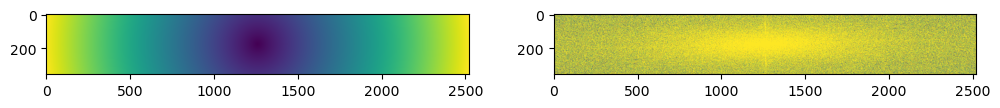

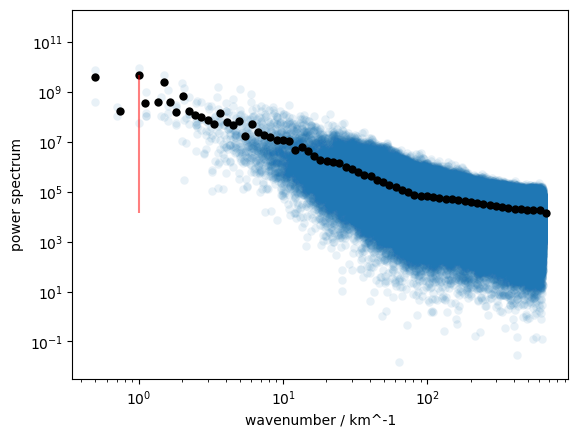

In [32]:
da_ps_rounded, peak_wavelength, peak_wavelength_excl_zero = get_power_spectrum(ds0, save_plot=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(wavenumber.T)
#ax[0].add_colorbar()
ax[1].imshow(power_spectrum.T, vmax=1e4)
#ax[1].add_colorbar()
plt.show()
da_ps.plot.scatter(xscale='log', yscale='log', lw=0, alpha=0.05)
da_ps_rounded.plot.scatter(xscale='log', yscale='log', lw=0, color='black')
plt.ylabel('power spectrum')
plt.xlabel('wavenumber / km^-1')
plt.vlines(peak_wavelength, da_ps_rounded.min(), da_ps_rounded.max(), color='yellow')
plt.vlines(peak_wavelength_excl_zero, da_ps_rounded_excl_zero.min(), da_ps_rounded_excl_zero.max(), color='red', alpha=0.5)

## LvL

In [34]:
import numpy as np
from scipy.stats import ks_2samp
from PIL import Image
from scipy.ndimage import label
import cv2

def LvL(cloud_mask):
    # Convert cloud_mask to double
    cloud_mask = cloud_mask.astype(float)
    sz = cloud_mask.shape
    mnsz = min(sz)  # minimum scale of the field
    #sz_cloud_mask = sz[0] * sz[1]
    sz_cloud_mask = cloud_mask.count().values
    #p = np.sum(cloud_mask) / sz_cloud_mask  # cloud fraction
    p = cloud_mask.mean().values

    # estimating the ideal length to capture almost 100% of the histogram
    # we want that the error < exp(-12) for the perfect rand case
    mxln = int(np.floor(abs(12 / np.log(p))) + 1)
    mxln = min(mxln, mnsz)

    # The cloud part
    # Flatenning along the two directions
    # then we need to divide c1 and c2 by two

    B = cloud_mask.values.flatten()  # rows
    C = cloud_mask.values.flatten(order='F') #columns 
    B = np.concatenate((C, B))

    L, num_labels = label(B)
    # Label connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(L.astype(np.uint8))

    # Extract area of each connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    # Adding one to the max area
    mx_ar = np.max(areas) + 1   

    # To avoid single histogram
    if mx_ar < mxln:
        mx_ar = mxln
    else:
        mxln = mx_ar

    # Get the cloud chord length counts - c1    
    c1, _ = np.histogram(areas, bins=np.arange(1, mx_ar + 2))
    # Correct for flattening in two directions
    c1 = c1 / 2
    s1 = np.sum(c1)

    # Now, the theortical calculations ct, nt for a given cloud fraction (p)
    nt1 = np.arange(1, mxln + 1)
    ct1 = (sz_cloud_mask * (1 - p) ** 2) * p ** nt1
    st1 = np.sum(ct1)
    nt1 = nt1.astype(int)


    # Get the KS score for the cloud part
    adf1 = np.abs(np.cumsum(ct1 / st1) - np.cumsum(c1 / s1))
    KS1 = np.max(adf1)


    # The void part
    q = 1 - p # void fraction
    mxln = int(np.floor(abs(12 / np.log(q))) + 1)
    mxln = min(mxln, mnsz)
    B = -B + 1

    L, num_labels = label(B)
    # Label connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(L.astype(np.uint8))

    # Extract area of each connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    # Adding one to the max area
    mx_ar = np.max(areas) + 1   

    if mx_ar < mxln:
        mx_ar = mxln
    else:
        mxln = mx_ar

    c2, _ = np.histogram(areas, bins=np.arange(1, mx_ar + 2))
    c2 = c2 / 2
    s2 = np.sum(c2)

    nt2 = np.arange(1, mxln + 1)
    ct2 = (sz_cloud_mask * (1 - q) ** 2) * q ** nt2
    st2 = np.sum(ct2)
    nt2 = nt2.astype(int)

    # Get the KS score for the void part
    adf2 = np.abs(np.cumsum(ct2 / st2) - np.cumsum(c2 / s2))
    KS2 = np.max(adf2)

    return KS1, KS2, c1, c2, ct1, ct2

In [17]:
valid_mask = ~np.isnan(ds0.latitude)
cld_mask = xr.where(ds0.cloud_water_path > 1e-2, 1, 0).where(valid_mask)

In [18]:
KS1, KS2, c1, c2, ct1, ct2 = LvL(cld_mask)

In [19]:
KS1, KS2, c1, c2, ct1, ct2

(np.float64(0.384088707690426),
 np.float64(0.5591252522140313),
 array([2.0110e+03, 1.8915e+03, 1.2315e+03, ..., 0.0000e+00, 5.0000e-01,
        0.0000e+00], shape=(1319,)),
 array([2.8605e+03, 2.6890e+03, 1.3340e+03, ..., 0.0000e+00, 5.0000e-01,
        0.0000e+00], shape=(5046,)),
 array([4.13059796e+004, 3.09469119e+004, 2.31857800e+004, ...,
        3.93906686e-161, 2.95119390e-161, 2.21106820e-161], shape=(1319,)),
 array([123398.41280319,  30946.91190157,   7761.13188563, ...,
             0.        ,      0.        ,      0.        ], shape=(5046,)))

/tmp/ipykernel_1385/1225712199.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,3e2)


(np.float64(0.6529154439772983), 300.0)

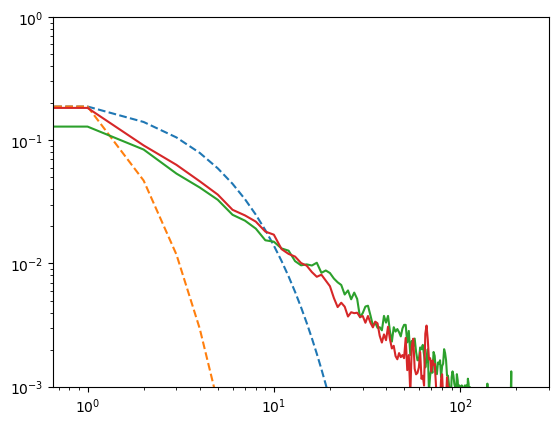

In [26]:
plt.loglog(ct1/np.sum(ct1), '--')
plt.loglog(ct2/np.sum(ct2), '--')
plt.loglog(c1/np.sum(c1))
plt.loglog(c2/np.sum(c2))
plt.ylim(1e-3,1e0)
plt.xlim(0,3e2)

# Loop through month

In [16]:
search = catalog.search(
    collections=["EarthCAREL2InstChecked_MAAP"], # Currently MAAP has access to this L2 collection 

    #filter="productType = 'MSI_COP_2A'", # Filter by product type
    filter="productType = 'MSI_COP_2A' and frame = 'E'",

    #datetime=['2025-04-01T00:00:00.000Z', '2025-04-30T23:59:00.000Z'], # filter by temporal extent 
    
    #bbox = [0, -20, 10, -10], # combine multiple bbox by OR 
    # bounding box is defined by the bottom left corner (longmin latmin) and the top right corner coordinates (longmax latmax) 
    method='GET',
    max_items=500  # Adjust as needed
)

items = list(search.items())
results = dict() # or just {} 
id_lst = []
href_lst = []

for item in items:
    try: 
        id_lst.append(item.id)
        href_lst.append(item.assets["enclosure_1"].href)
    except KeyError:
        print('error in item ', item)

for i, j in zip(id_lst, href_lst):
    results.update({i: j})


In [17]:
len(href_lst)

460

In [24]:
date_time[9:11]

'16'

In [25]:
fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})

columns = ['orbit', 'date_time', 'n_pixels', 'cloud_cover', 'lwp_mean', 'lwp_std', 'homog_param', 'lwp_skew', 'lwp_curtosis', 'LvL_KS1', 'LvL_KS2', 'peak_wavelength', 'peak_wavelength_excl_zero']

df_results = pd.DataFrame(columns = columns)

for href in href_lst:
    orbit = href[-9:-3]
    date_time = href[-43:-27]
    
    if date_time[9:11] in ['12','13','14','15']:
        with fs.open(href, "rb") as f:
            print(f)
            with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
                ds = ds[['latitude','longitude','cloud_water_path']].compute()
                plt.show()
                    
                if len(ds.along_track) == 0:
                    print('no data in dataset...continuing\n')
                    continue
                    
                ds0 = crop_to_stcu_region(ds)
        
        if len(ds0.along_track) == 0:
            print('no data in cropped dataset...continuing\n')
            continue
            
        print('... computing LWP distribution measures')
        n_pixels = get_number_of_pixels_in_region(ds0)
        # TODO Frame numbers
        cloud_mask = get_cloud_mask(ds0)
        cloud_cover = float(cloud_mask.mean().values)
        lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis = compute_lwp_distr_parameters(lwp=ds0.cloud_water_path)
        
        print('... computing LvL measures')
        KS1, KS2, c1, c2, ct1, ct2 = LvL(cld_mask)
        if save_plot is not None:
            plt.loglog(ct1/np.sum(ct1), '--', label='cloud random')
            plt.loglog(ct2/np.sum(ct2), '--', label='void random')
            plt.loglog(c1/np.sum(c1), label='cloud observed')
            plt.loglog(c2/np.sum(c2), label='void observed')
            plt.ylim(1e-3,1e0)
            plt.xlim(0,3e2)
            plt.savefig(save_plot)
        
        print('... computing power spectrum')
        da_ps_rounded, peak_wavelength, peak_wavelength_excl_zero = get_power_spectrum(ds0, save_plot=True)
        if save_plot:
            fig, ax = plt.subplots(1, 2, figsize=(12,6))
            ax[0].imshow(wavenumber.T)
            #ax[0].add_colorbar()
            ax[1].imshow(power_spectrum.T, vmax=1e4)
            #ax[1].add_colorbar()
            plt.show()
            da_ps.plot.scatter(xscale='log', yscale='log', lw=0, alpha=0.05)
            da_ps_rounded.plot.scatter(xscale='log', yscale='log', lw=0, color='black')
            plt.ylabel('power spectrum')
            plt.xlabel('wavenumber / km^-1')
            plt.vlines(peak_wavelength, da_ps_rounded.min(), da_ps_rounded.max(), color='yellow')
            plt.vlines(peak_wavelength_excl_zero, da_ps_rounded_excl_zero.min(), da_ps_rounded_excl_zero.max(), color='red', alpha=0.5)
            
        df_orbit = pd.DataFrame([[orbit, date_time, n_pixels, cloud_cover, lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis, KS1, KS2, peak_wavelength, peak_wavelength_excl_zero]], columns = columns)
    
        df_results = pd.concat([df_results, df_orbit])
        

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/02/ECA_EXAB_MSI_COP_2A_20250402T141452Z_20250402T154647Z_04802E/ECA_EXAB_MSI_COP_2A_20250402T141452Z_20250402T154647Z_04802E/ECA_EXAB_MSI_COP_2A_20250402T141452Z_20250402T154647Z_04802E.h5>
no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/03/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E.h5>
no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/04/ECA_EXAB_MSI_COP_2A_20250404T123123Z_20250404T140548Z_04832E/ECA_EXAB_MSI_COP_2A_20250404T123123Z_20250404T140548Z_04832E/ECA_EXAB_MSI_COP_2A_20250404T123123Z_20250404T1405

/tmp/ipykernel_105/1846207985.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, df_orbit])


<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/08/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E.h5>
... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/12/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E.h5>
no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/16/ECA_EXAB_MSI_COP_2A_20250416T142927Z_20250416T160115Z_05020E/ECA_EXAB_MSI_COP_2A_20250416T142927Z_20250416T160115Z_05020E/ECA_EXAB_MSI_COP_2A_2025

In [26]:
df_results.to_csv('stcu_morphology.csv')

In [50]:
df_results

,orbit,date_time,cloud_cover,lwp_mean,lwp_std,homog_param,lwp_skew,lwp_curtosis,LvL_KS1,LvL_KS2,cc
0,04848E,20250405T131207Z,0.7492114266418582,0.084000,0.094895,0.783567,3.286186,17.298710,0.384089,0.559125,0.749211
0,04895E,20250408T134126Z,0.19478135692144605,0.044043,0.050714,0.754240,4.520014,31.780281,0.592004,0.194574,0.194781
0,04786E,20250401T133403Z,0.7154342431761787,0.084479,0.086968,0.943576,2.989427,15.084003,0.166344,0.522267,0.715434
0,04817E,20250403T132309Z,0.709653979791343,0.067268,0.058401,1.326713,3.657519,29.745697,0.400734,0.543125,0.709654
0,04879E,20250407T130051Z,0.11526580096141752,0.047963,0.078145,0.376717,7.247196,89.776581,0.671903,0.231539,0.115266
0,04988E,20250414T130805Z,0.3899228647048525,0.032250,0.022606,2.035160,1.904809,5.628466,0.375860,0.262585,0.389923
0,05019E,20250416T125654Z,0.7238919557463822,0.029451,0.014240,4.277599,0.875900,0.172053,0.397714,0.498892,0.723892
0,05128E,20250423T130426Z,0.40640374246132394,0.029650,0.019743,2.255246,2.027880,5.654301,0.478562,0.304502,0.406404
0,05237E,20250430T131146Z,0.6796313195838657,0.054989,0.041650,1.743110,1.755268,7.016043,0.175043,0.436505,0.679631
0,04957E,20250412T131922Z,0.4569336970248709,0.058392,0.086185,0.459035,6.754057,74.050201,0.390563,0.434093,0.456934


In [39]:
df_results['cc'] = df_results.cloud_cover.astype(float)

# results

<Axes: xlabel='cc', ylabel='lwp_mean'>

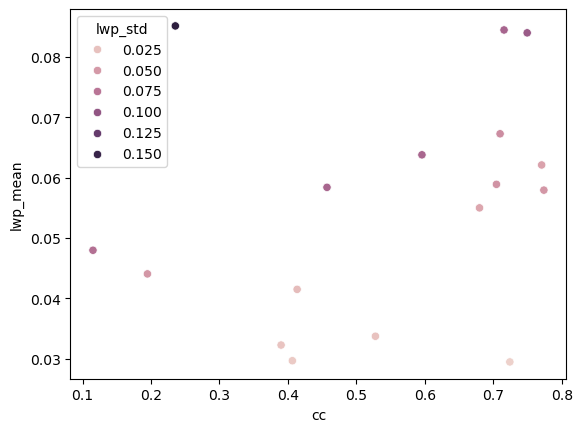

In [42]:
sns.scatterplot(data=df_results, x='cc', y='lwp_mean', hue='lwp_std')

<Axes: xlabel='cc', ylabel='lwp_mean'>

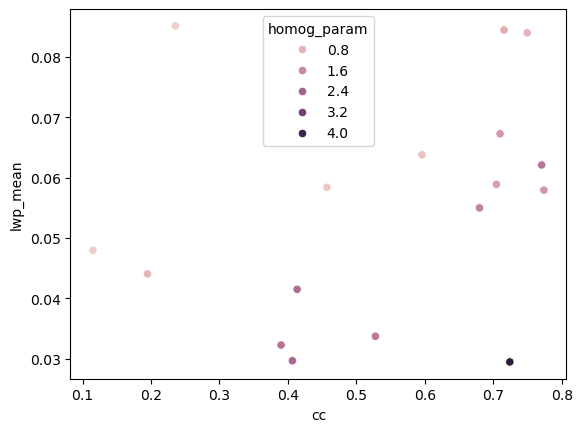

In [51]:
sns.scatterplot(data=df_results, x='cc', y='lwp_mean', hue='homog_param')

<Axes: xlabel='cc', ylabel='lwp_skew'>

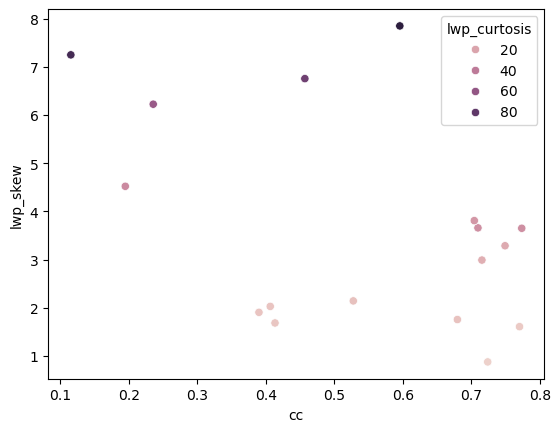

In [44]:
sns.scatterplot(data=df_results, x='cc', y='lwp_skew', hue='lwp_curtosis')

<Axes: xlabel='cc', ylabel='LvL_KS1'>

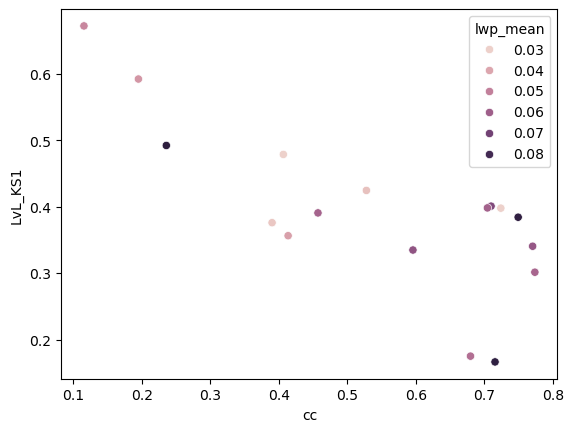

In [52]:
sns.scatterplot(data=df_results, x='cc', y='LvL_KS1', hue='lwp_mean')

<Axes: xlabel='cc', ylabel='LvL_KS2'>

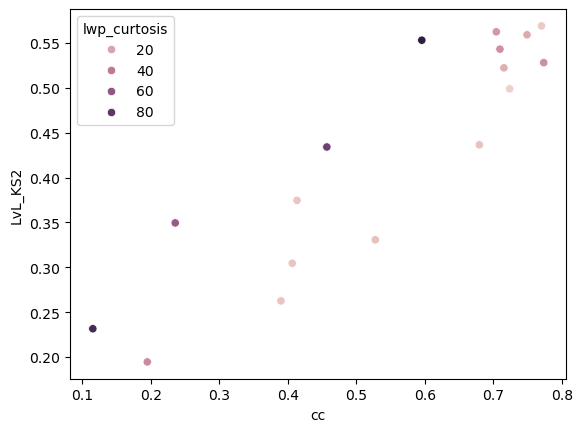

In [47]:
sns.scatterplot(data=df_results, x='cc', y='LvL_KS2', hue='lwp_curtosis')

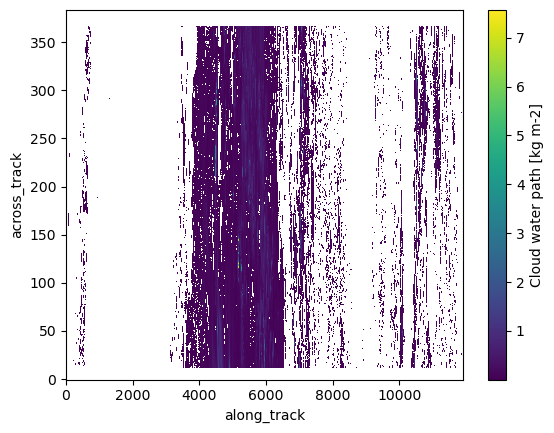

In [245]:
ds.cloud_water_path.T.plot()

In [248]:
ds.longitude.max()

<xarray.DataArray 'longitude' ()> Size: 8B
array(-10.09677124)

In [249]:
ds.longitude.min()

<xarray.DataArray 'longitude' ()> Size: 8B
array(-21.09182739)